## Install ultralytics to get YOLO Model

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 56.5 MB/s eta 0:00:00


In [ ]:
#### !unzip vehicles.v2-release.yolov8.zip

## Importing libraries


In [2]:
# reading images - select random imgaes - to show image

import os
import random
from PIL import Image

# to visulaion -  to visulaion -

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO


## Reading the data

In [3]:
!unzip vehicles.v2-release.yolov8.zip

base_dir = '/content/train'

data_dir = os.path.join(base_dir,'images')
test_dir = ('/content/test/images')

Streaming output truncated to the last 5000 lines.
 extracting: train/images/pagi_16112021_mp4-498_jpg.rf.e941e45da938985e0ea6473846b01df4.jpg  
 extracting: train/images/pagi_16112021_mp4-49_jpg.rf.1ebd6717089c199d37f358b3ba1acf9e.jpg  
 extracting: train/images/pagi_16112021_mp4-4_jpg.rf.67448ac10fe97f9cbfea896f5bd4cb5f.jpg  
 extracting: train/images/pagi_16112021_mp4-500_jpg.rf.e9577a1bbfa6063656b78f80e015c0db.jpg  
 extracting: train/images/pagi_16112021_mp4-501_jpg.rf.ec043bbc6ec5e58fc50ae78c7de1384d.jpg  
 extracting: train/images/pagi_16112021_mp4-502_jpg.rf.43d3ed3b64d01c46642905532a26263a.jpg  
 extracting: train/images/pagi_16112021_mp4-503_jpg.rf.fe545665e56d73879cd268e807a36de4.jpg  
 extracting: train/images/pagi_16112021_mp4-504_jpg.rf.73453b206efef863a28640547d930749.jpg  
 extracting: train/images/pagi_16112021_mp4-505_jpg.rf.e13968e2fc914c31d94ede709d91a7fd.jpg  
 extracting: train/images/pagi_16112021_mp4-506_jpg.rf.b3bc59fa0ccd981d6401b527a817332a.jpg  
 extracting:

## To visualize the images

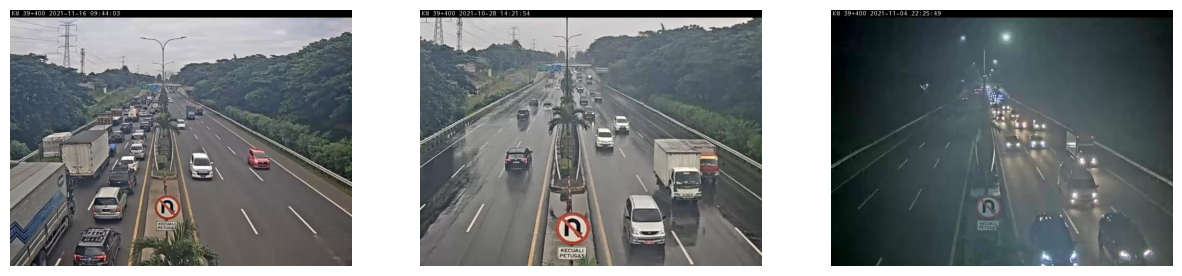

In [5]:
# read only images inside the folder

data = os.listdir(data_dir)

image_files = [f for f in data if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]


number_of_images_to_display = min(3, len(image_files))

random_images = random.sample(image_files, number_of_images_to_display)

fig, axes = plt.subplots(1, number_of_images_to_display, figsize=(15,5))

for i, image_name in enumerate(random_images):
  image_path = os.path.join(data_dir, image_name)
  img = mpimg.imread(image_path)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.show()


## Fitching the trained model (YOLO)

In [6]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 296MB/s]


## Train the Model

In [7]:
results = model.train(data='/content/data.yaml', epochs=20,)

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 83.2MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/train/labels... 2634 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2634/2634 [00:01<00:00, 1725.22it/s]

train: WARNING ⚠️ /content/train/images/adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e.jpg: 2 duplicate labels removed


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:01<00:00, 663.82it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.08G      1.472      2.461      1.135        137        640: 100%|██████████| 165/165 [01:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.73it/s]


                   all        966      13450      0.333      0.331       0.17      0.099

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.42G       1.36      1.452      1.089        176        640: 100%|██████████| 165/165 [00:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.28it/s]


                   all        966      13450       0.41      0.325      0.247      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.92G      1.308      1.295      1.073        164        640: 100%|██████████| 165/165 [00:52<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.32it/s]


                   all        966      13450      0.326      0.476       0.33      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.61G      1.294      1.205      1.061        178        640: 100%|██████████| 165/165 [00:52<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.13it/s]


                   all        966      13450      0.369      0.431      0.366      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         3G      1.266      1.114      1.058        178        640: 100%|██████████| 165/165 [00:54<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.12it/s]


                   all        966      13450       0.32      0.479      0.351      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.88G      1.247      1.056      1.053        163        640: 100%|██████████| 165/165 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.09it/s]


                   all        966      13450      0.394      0.458      0.361      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.02G      1.223      1.012      1.044        182        640: 100%|██████████| 165/165 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.31it/s]


                   all        966      13450      0.427       0.42      0.364      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.8G      1.218     0.9638      1.037        109        640: 100%|██████████| 165/165 [00:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]


                   all        966      13450      0.402      0.491      0.381       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.14G      1.202     0.9238      1.036        199        640: 100%|██████████| 165/165 [00:56<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.43it/s]


                   all        966      13450      0.463      0.471      0.408      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.93G      1.186     0.8924       1.03        173        640: 100%|██████████| 165/165 [00:52<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.14it/s]


                   all        966      13450      0.418      0.466      0.378      0.258
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.59G      1.181     0.8567      1.037         92        640: 100%|██████████| 165/165 [00:54<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.95it/s]


                   all        966      13450      0.442      0.504      0.392      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.25G      1.165     0.8144      1.033        130        640: 100%|██████████| 165/165 [00:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.14it/s]


                   all        966      13450      0.445      0.515      0.408      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.25G      1.151     0.7824      1.027        134        640: 100%|██████████| 165/165 [00:50<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.41it/s]


                   all        966      13450      0.445       0.53      0.413      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.28G      1.138     0.7573      1.024        114        640: 100%|██████████| 165/165 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.69it/s]


                   all        966      13450      0.463      0.515      0.411      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.24G      1.127     0.7331      1.018        103        640: 100%|██████████| 165/165 [00:48<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.22it/s]


                   all        966      13450      0.453      0.525      0.417      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.25G      1.123     0.7156      1.015        102        640: 100%|██████████| 165/165 [00:50<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06<00:00,  4.55it/s]


                   all        966      13450      0.495      0.499      0.408      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.26G      1.112     0.7033      1.014        146        640: 100%|██████████| 165/165 [00:53<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.25it/s]

                   all        966      13450      0.464      0.531       0.42      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.27G      1.101     0.6872      1.008         95        640: 100%|██████████| 165/165 [00:48<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.21it/s]


                   all        966      13450      0.472      0.538       0.42      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.24G      1.088     0.6736      1.003        113        640: 100%|██████████| 165/165 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.10it/s]


                   all        966      13450      0.475      0.534      0.417      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.24G       1.08     0.6645     0.9989        141        640: 100%|██████████| 165/165 [00:49<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.32it/s]

                   all        966      13450      0.491      0.537      0.417      0.294



20 epochs completed in 0.345 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]


                   all        966      13450      0.472      0.538       0.42      0.295
               big bus        210        273      0.779      0.432      0.659      0.497
             big truck        404       1162      0.783      0.464      0.618      0.394
                bus-l-          8          8     0.0309        0.5     0.0326     0.0166
                bus-s-         12         12      0.278       0.75      0.283      0.227
                   car        927       8537      0.861      0.713       0.82      0.504
             mid truck        118        257      0.607      0.401       0.37      0.283
             small bus         43         49     0.0769     0.0612     0.0707     0.0464
           small truck        517       1721      0.733       0.48      0.579      0.368
              truck-l-        266        433       0.44      0.661      0.448      0.334
              truck-m-        331        629      0.395      0.685      0.374      0.279
              truck-s

## Evaluate the model


In [8]:
# Access the DetMetrics object for bounding box metrics directly
metrics = results.box

# Now you can access the metrics
print(f"mAP50: {metrics.maps[0]:.4f}")  # Access mAP50
print(f"Precision: {metrics.mean_results()[0]:.4f}")  # Access mean precision
print(f"Recall: {metrics.mean_results()[1]:.4f}")  # Access mean recall

mAP50: 0.4971
Precision: 0.4718
Recall: 0.5376


## Testing the model to detect a vehicle


image 1/1 /content/test/images/malam_04112021_mp4-530_jpg.rf.e8ab24dc0dbc343b2590989ea58d697d.jpg: 480x640 4 cars, 1 truck-m-, 1 truck-xl-, 74.2ms
Speed: 2.0ms preprocess, 74.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/test/images/adit_mp4-855_jpg.rf.9be0929201cfa19605e0dbbb564df75a.jpg: 480x640 2 big trucks, 7 cars, 1 small truck, 1 truck-s-, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/test/images/adit_mp4-1292_jpg.rf.71a94aa7e287d460fbc00bf059275c12.jpg: 480x640 1 big bus, 8 big trucks, 8 cars, 3 small trucks, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


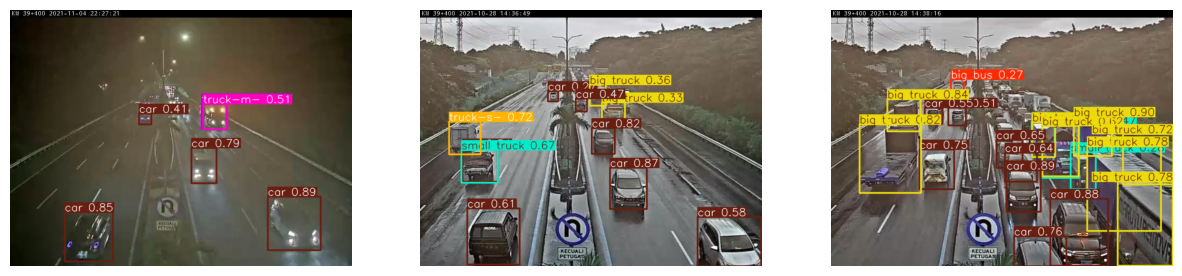

In [9]:
test_data = os.listdir(test_dir)
test_image_files = [f for f in test_data if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

number_of_images_to_display = min(3, len(test_image_files))
random_test_images = random.sample(test_image_files, number_of_images_to_display)

fig, axes = plt.subplots(1, number_of_images_to_display, figsize=(15, 5))

for i, image_name in enumerate(random_test_images):
  image_path = os.path.join(test_dir, image_name)
  results = model(image_path)  # Perform inference

  # Visualize the results on the image
  res_plotted = results[0].plot()
  axes[i].imshow(res_plotted)
  axes[i].axis('off')

plt.show()


## One Larg Sample


0: 480x640 2 big trucks, 14 cars, 2 small trucks, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


array([[[  2,   2,   2],
        [  7,   7,   7],
        [  6,   6,   6],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  8,   8,   8],
        [  0,   0,   0],
        [  4,   4,   4],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  4,   4,   4],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 94,  90,  85],
        [ 94,  90,  85],
        [ 94,  90,  85],
        ...,
        [ 67,  62,  47],
        [ 78,  59,  45],
        [104,  31,  17]],

       [[ 94,  90,  85],
        [ 94,  90,  85],
        [ 94,  90,  85],
        ...,
        [ 88,  70,  53],
        [ 93,  64,  47],
        [104,  31,  17]],

       [[ 94,  90,  85],
        [ 94,  90,  85],
        [ 94,  90,  85],
        ...,
        [104,  31,  17],
        [104,  31,  17],
        [104,  31,  17]]], dtype=uint8)
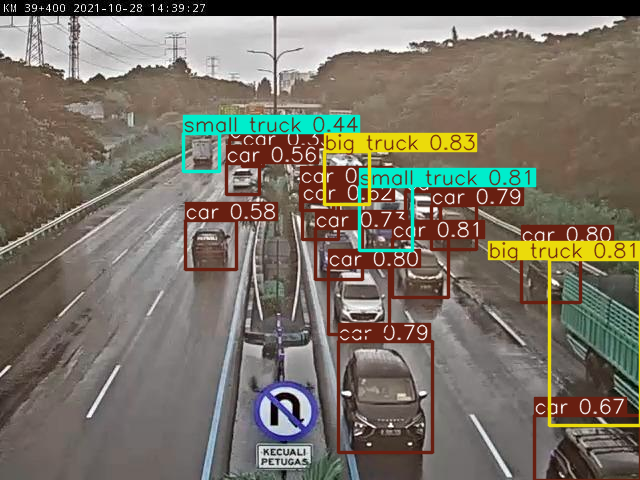

In [10]:
img = Image.open('/content/test/images/adit_mp4-1643_jpg.rf.9f0eecf0cb05d3528abe0b3f102b74db.jpg')
results = model(img)
results[0].plot()